In [143]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox



from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
avocado_dataset=pd.read_csv('avocado.csv')

# Exploratory Analysis

In [3]:
avocado_dataset.shape

(18249, 14)

Dataset Size is big

In [4]:
avocado_dataset

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Indication and explanation of each column:
1. Unnamed:0 must be Serial number column of the dataset but the tail numeric value doesn't indicate it as a serial number.
2. Date: The date of the observation
3. AveragePrice - the average price of a single avocado
4. Total Volume - Total number of avocados sold
5. 4046 - Total number of avocados with PLU 4046 sold (small/medium size avocado)
6. 4225 - Total number of avocados with PLU 4225 sold (large size avocado)
7. 4770 - Total number of avocados with PLU 4770 sold (extra large size avocado)
8. Total Bags- Total number of Bags sold
9. Small Bags- Total number of small bags sold
10. Large Bags- Total number of large bags sold
11. XLarge Bags- Total number of Xlarge bags sold
12. type - conventional or organic
13. year - the year
14. Region - the city or region of the observation

In [5]:
avocado_dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
avocado_dataset.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [7]:
avocado_dataset.shape

(18249, 13)

In [8]:
avocado_dataset.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

dataset has no null values

In [9]:
avocado_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


DataTypes of the columns : float64(9), int64(1), object(3)

Data,  type and region are categorical data, where date is ordinal. 

In [10]:
avocado_dataset.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

before converting date, type and region to numerical value let's properly visualize the data

# Data Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

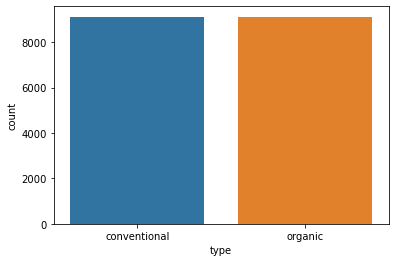

In [11]:
sns.countplot('type',data=avocado_dataset)

<AxesSubplot:xlabel='count', ylabel='region'>

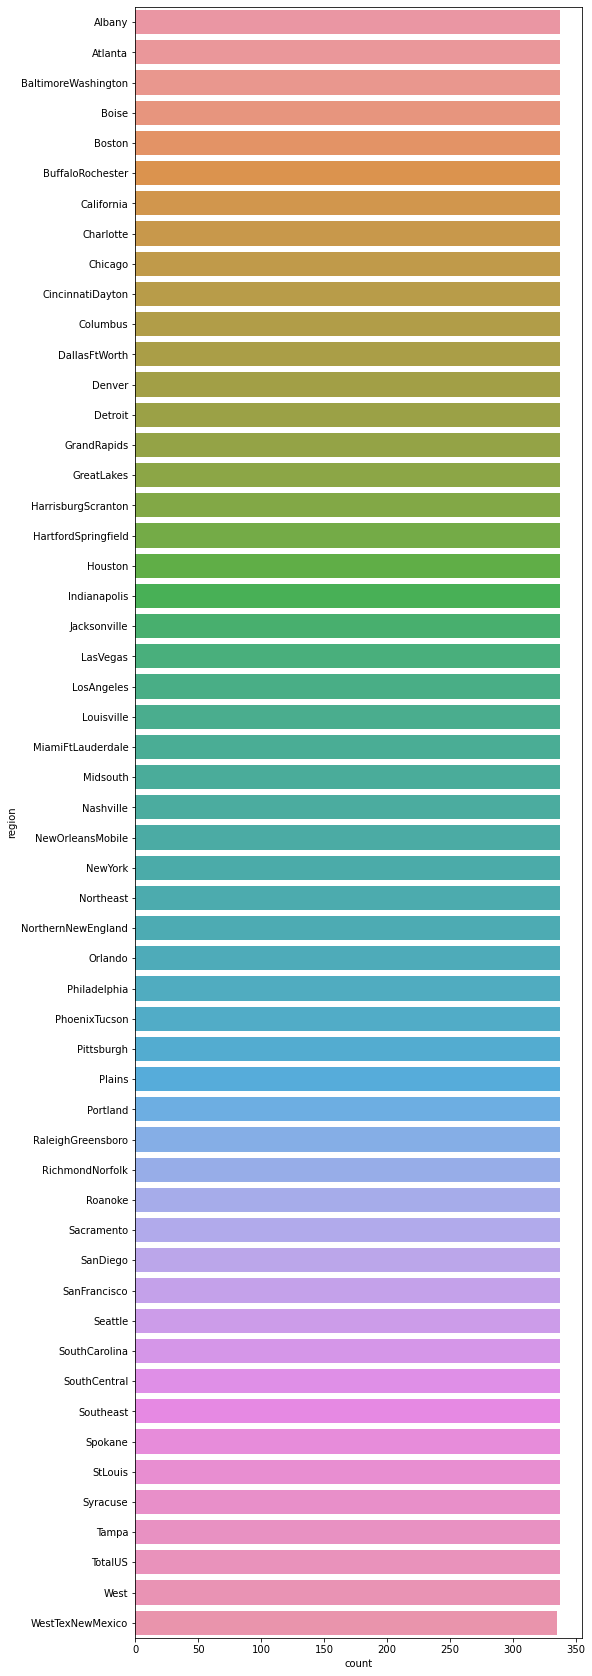

In [12]:
plt.figure(figsize = (8,30))
sns.countplot(y='region' ,data=avocado_dataset)

Text(0.5, 1.0, 'Average Price of Avocado datewise')

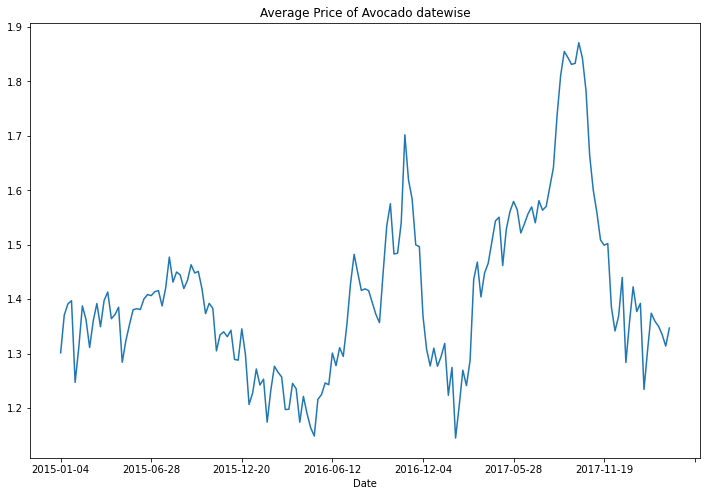

In [13]:
byDate=avocado_dataset.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price of Avocado datewise')

Text(0.5, 1.0, 'Average Price of Avocado by Volume margin')

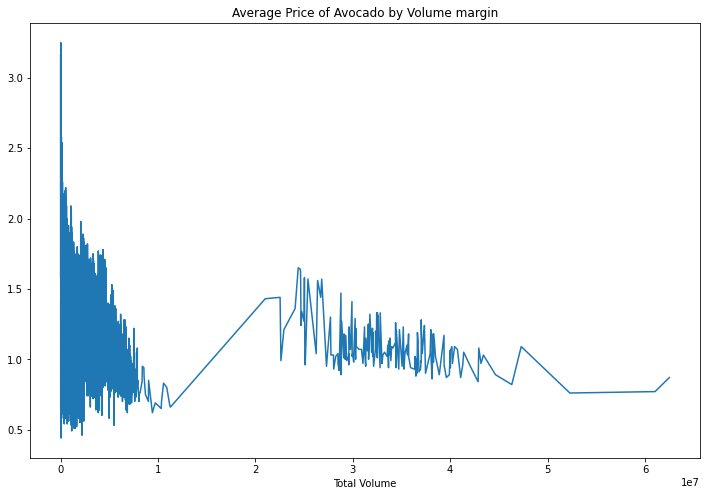

In [14]:
byDate=avocado_dataset.groupby('Total Volume').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price of Avocado by Volume margin')

<AxesSubplot:xlabel='count', ylabel='AveragePrice'>

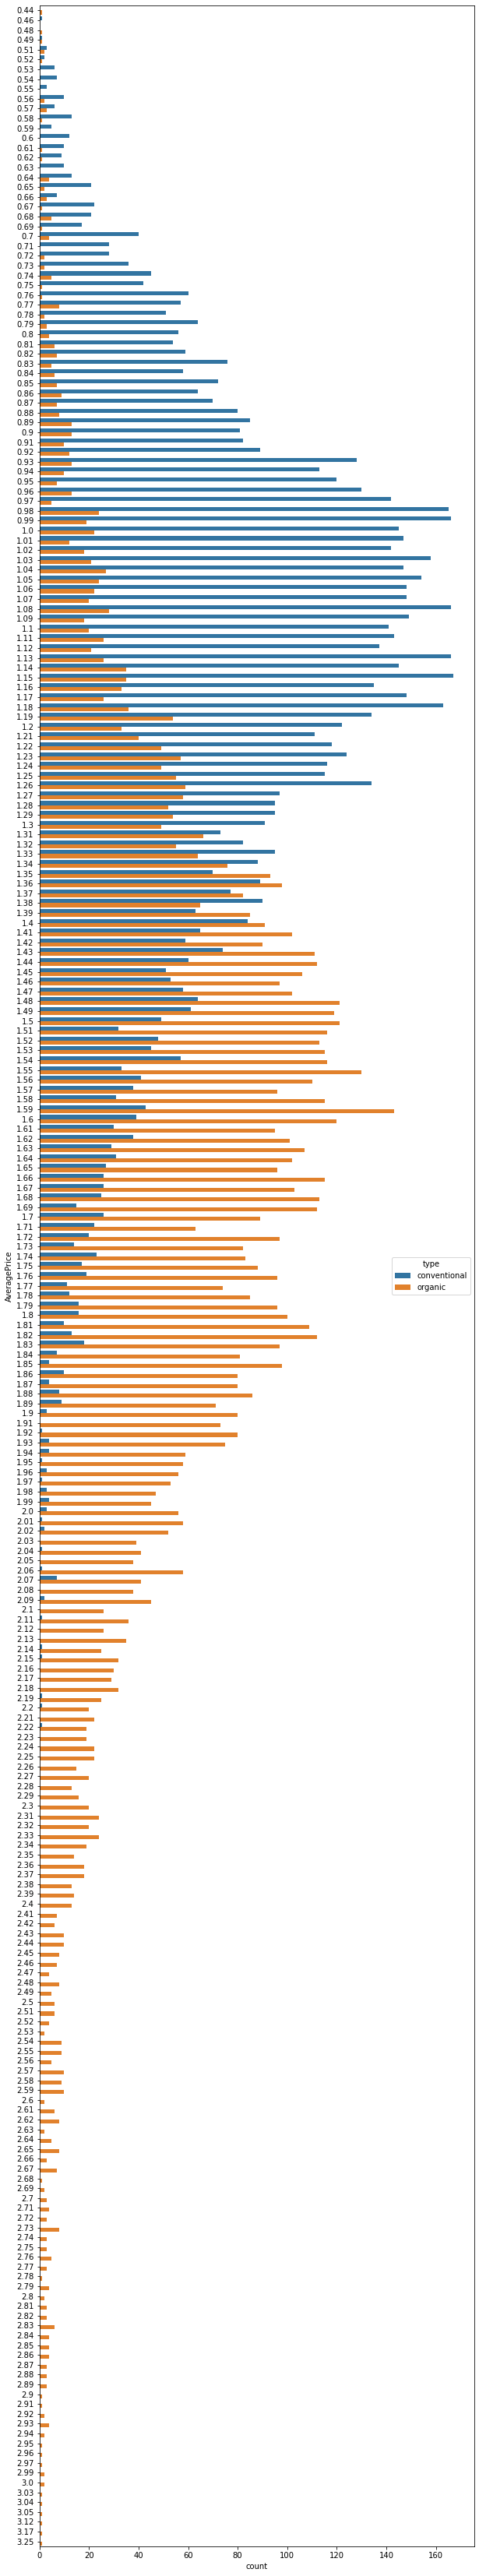

In [15]:
plt.figure(figsize=(10,60))

sns.countplot(y='AveragePrice', hue= 'type', data=avocado_dataset)

<AxesSubplot:xlabel='year', ylabel='count'>

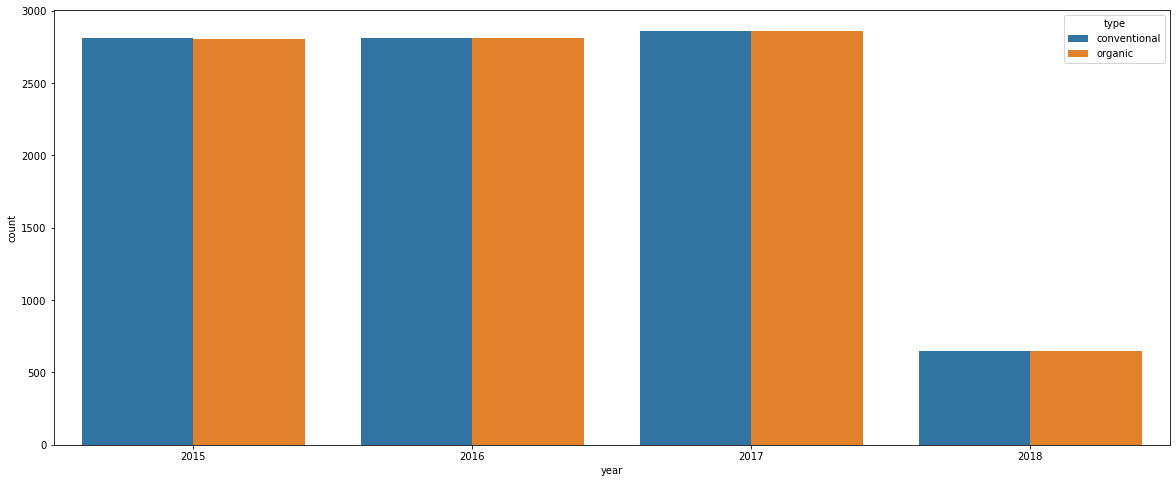

In [16]:
plt.figure(figsize=(20,8))

sns.countplot('year', hue= 'type', data=avocado_dataset)

<AxesSubplot:xlabel='count', ylabel='AveragePrice'>

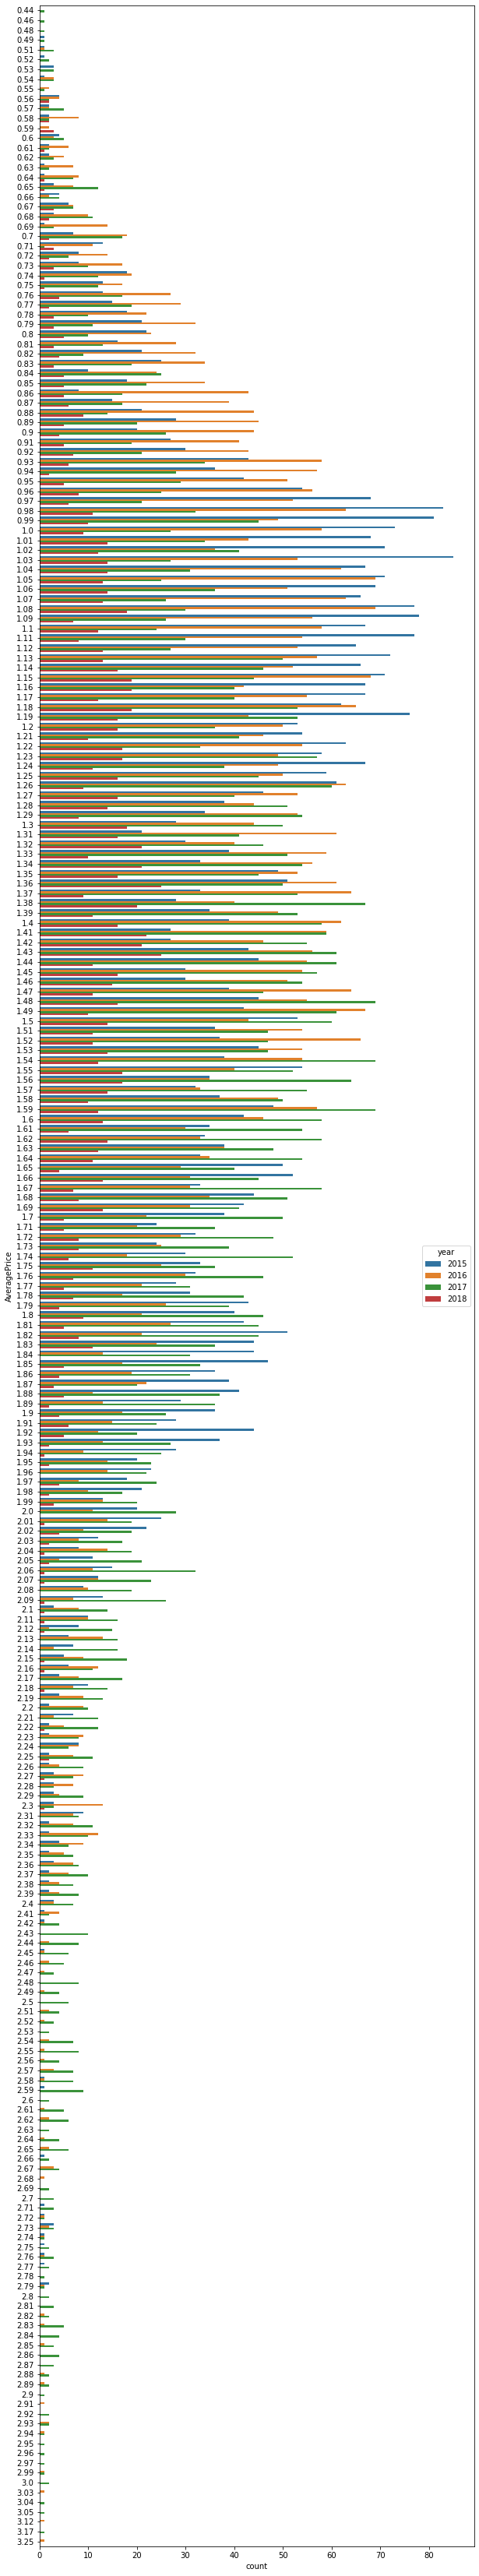

In [17]:
plt.figure(figsize=(10,60))

sns.countplot(y='AveragePrice', hue= 'year', data=avocado_dataset)

<AxesSubplot:xlabel='count', ylabel='AveragePrice'>

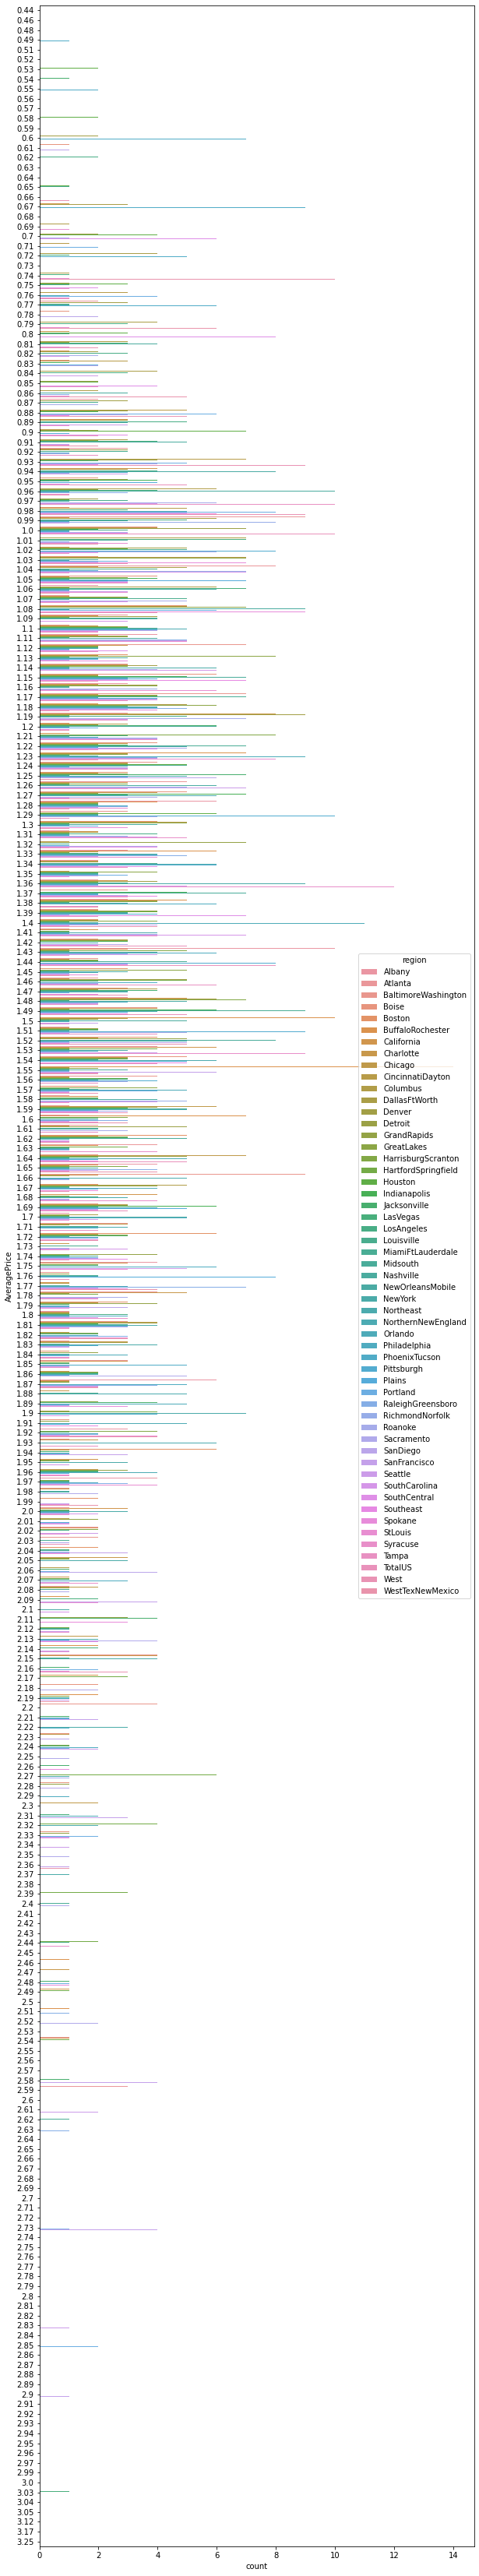

In [18]:
plt.figure(figsize=(10,60))

sns.countplot(y='AveragePrice', hue= 'region', data=avocado_dataset)

In [19]:
date_ordering= sorted(avocado_dataset['Date'].unique())
region_ordering=sorted(avocado_dataset['region'].unique())

In [20]:
print('Date Order :\n',date_ordering)
print('Region Order :\n',region_ordering)

Date Order :
 ['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25', '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22', '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22', '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19', '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17', '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14', '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29', '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27', '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24', '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20', '2016-03-27', '2016-04-03', '2016-04-10', '2016-04-17', '2016-04-24', '2016-05-01', '2016

In [21]:
def ordinal_en(df, column, ordering):
    df[column]=df[column].apply(lambda x: ordering.index(x))

In [22]:
ordinal_en(avocado_dataset, 'Date', date_ordering)
ordinal_en(avocado_dataset, 'region', region_ordering)

In [23]:
le= LabelEncoder()
avocado_dataset['type']=le.fit_transform(avocado_dataset['type'])

In [24]:
avocado_dataset

Date  AveragePrice  Total Volume     4046       4225    4770  \
0        51          1.33      64236.62  1036.74   54454.85   48.16   
1        50          1.35      54876.98   674.28   44638.81   58.33   
2        49          0.93     118220.22   794.70  109149.67  130.50   
3        48          1.08      78992.15  1132.00   71976.41   72.58   
4        47          1.28      51039.60   941.48   43838.39   75.78   
...     ...           ...           ...      ...        ...     ...   
18244   161          1.63      17074.83  2046.96    1529.20    0.00   
18245   160          1.71      13888.04  1191.70    3431.50    0.00   
18246   159          1.87      13766.76  1191.92    2452.79  727.94   
18247   158          1.93      16205.22  1527.63    2981.04  727.01   
18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85          0.0     1  2018      53  
18245     9264.84     8940.04      324.80          0.0     1  2018      53  
18246     9394.11     9351.80       42.31          0.0     1  2018      53  
18247    10969.54    10919.54       50.00          0.0     1  2018      53  
18248    12014.15    11988.14       26.01          0.0     1  2018      53  

[18249 rows x 13 columns]

Converted All the categorical data into numerical data, cross checking if the unique values of the columns is same as before label encoding

In [25]:
avocado_dataset.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Date


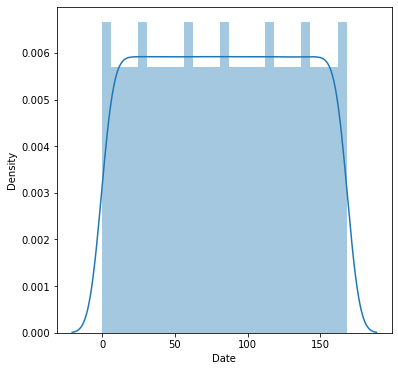

AveragePrice


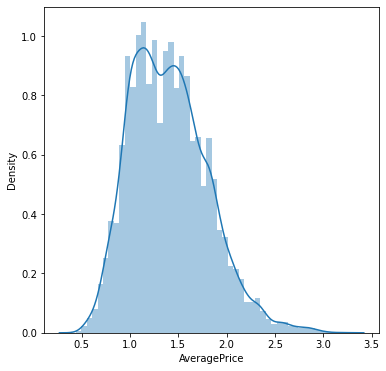

Total Volume


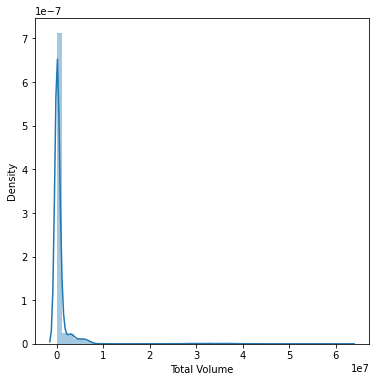

4046


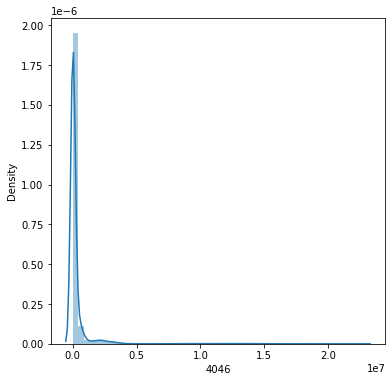

4225


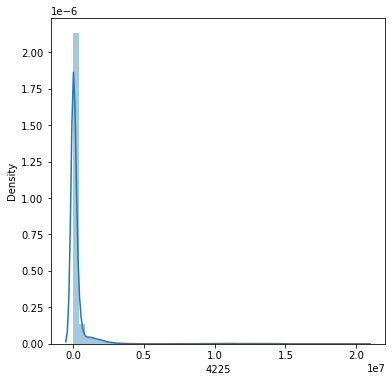

4770


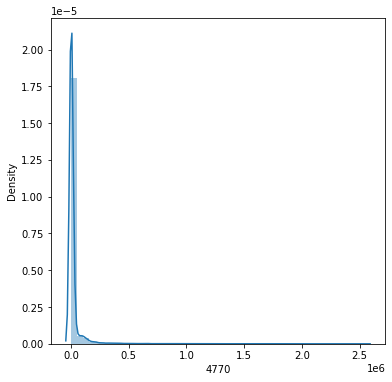

Total Bags


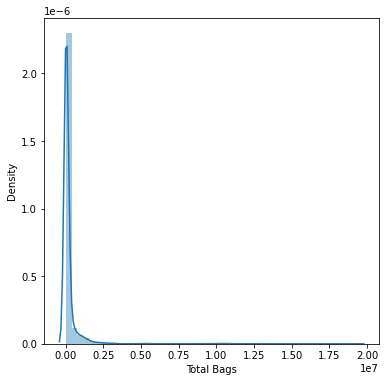

Small Bags


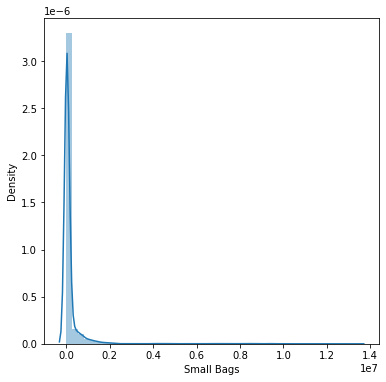

Large Bags


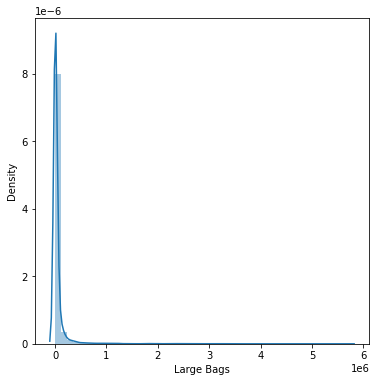

XLarge Bags


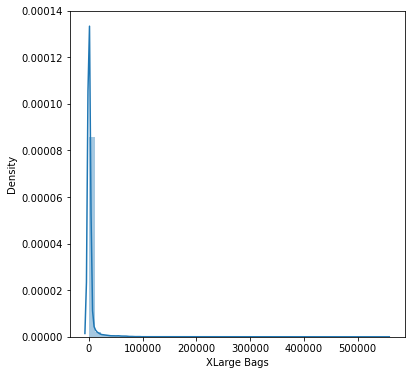

type


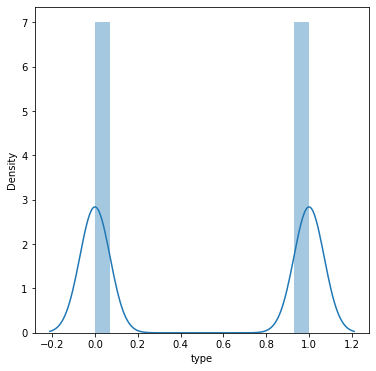

year


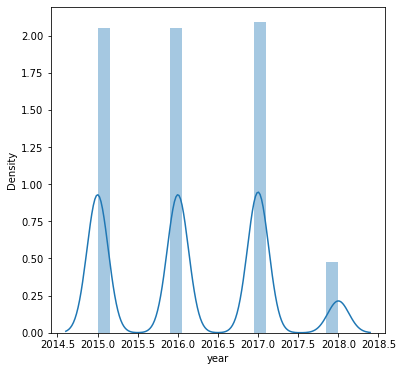

region


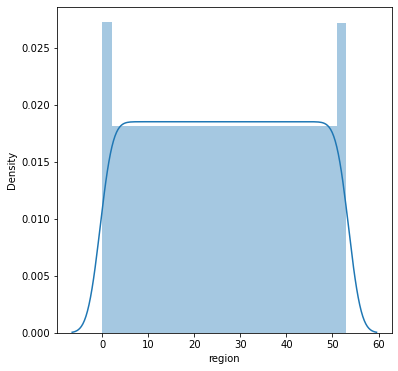

In [26]:
for i in avocado_dataset:
    print(i)
    plt.figure(figsize=(6,6))
    sns.distplot(avocado_dataset[i])
    plt.show()

In [27]:
avocado_dataset.describe()

Date  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      83.997096      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       48.787638      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       42.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       84.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%      126.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max      168.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

Date


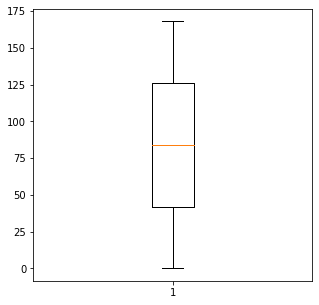

AveragePrice


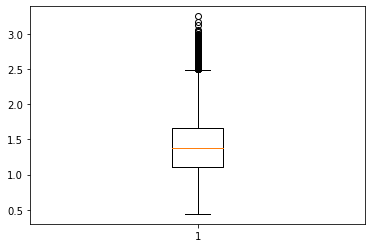

Total Volume


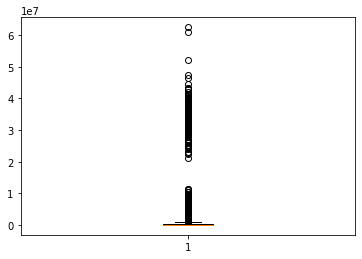

4046


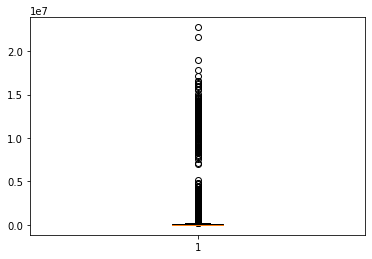

4225


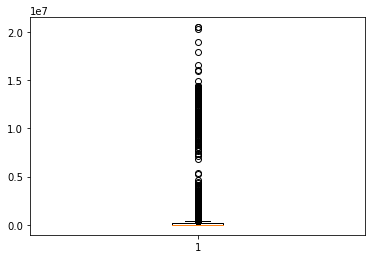

4770


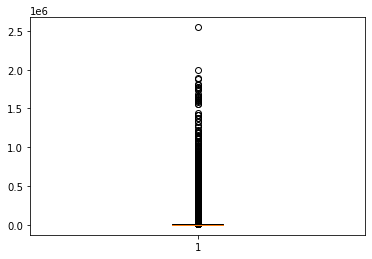

Total Bags


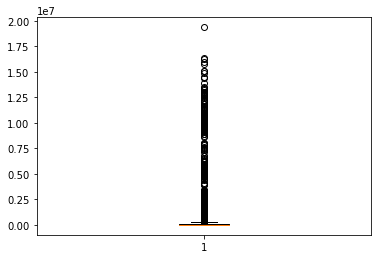

Small Bags


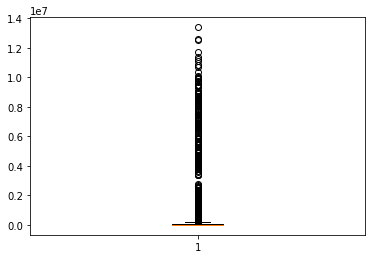

Large Bags


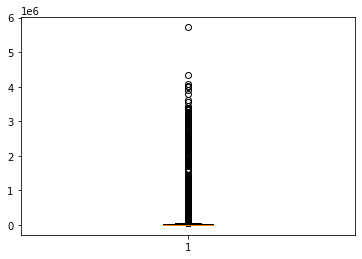

XLarge Bags


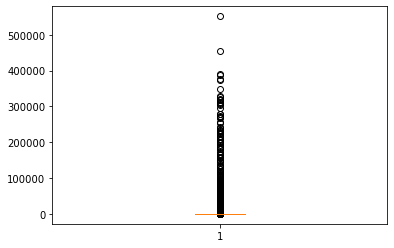

type


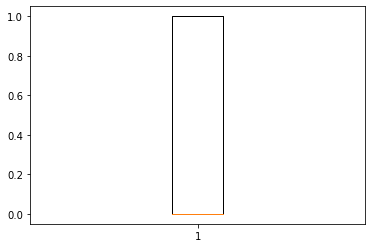

year


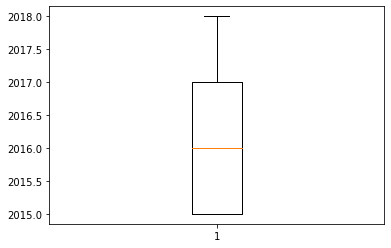

region


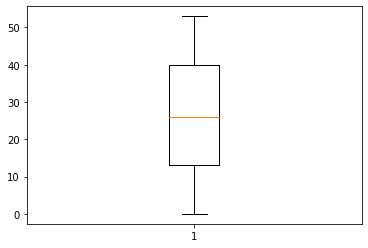

In [28]:
fig = plt.figure(figsize =(5, 5))
for i in avocado_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(avocado_dataset[i])
    # show plot
    plt.show()

In [29]:
avocado_dataset.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Checking number of outliers

In [31]:
def outlier_count(df,column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    threshold = 3
    count=0
    for i in df[column]:
        z = (i-mean)/std
        if z > threshold:
            count+=1
    print(column+' outliers count : ',count)   

In [32]:
outlier_count(avocado_dataset,'AveragePrice')
outlier_count(avocado_dataset,'Total Volume')
outlier_count(avocado_dataset,'4046')
outlier_count(avocado_dataset,'4225')
outlier_count(avocado_dataset,'4770')
outlier_count(avocado_dataset,'Total Bags')
outlier_count(avocado_dataset,'Small Bags')
outlier_count(avocado_dataset,'Large Bags')
outlier_count(avocado_dataset,'XLarge Bags')

AveragePrice outliers count :  131
Total Volume outliers count :  171
4046 outliers count :  181
4225 outliers count :  180
4770 outliers count :  259
Total Bags outliers count :  187
Small Bags outliers count :  179
Large Bags outliers count :  251
XLarge Bags outliers count :  234


In [33]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))

In [34]:
arr_out(avocado_dataset,'AveragePrice')
arr_out(avocado_dataset,'Total Volume')
arr_out(avocado_dataset,'4046')
arr_out(avocado_dataset,'4225')
arr_out(avocado_dataset,'4770')
arr_out(avocado_dataset,'Total Bags')
arr_out(avocado_dataset,'Small Bags')
arr_out(avocado_dataset,'Large Bags')
arr_out(avocado_dataset,'XLarge Bags')

Date


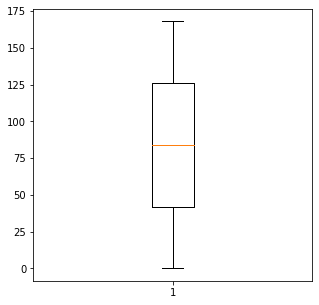

AveragePrice


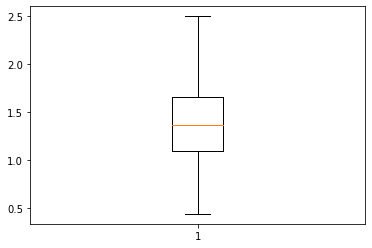

Total Volume


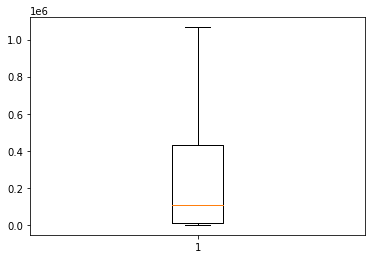

4046


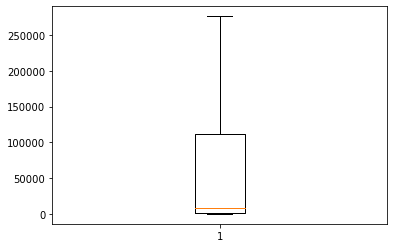

4225


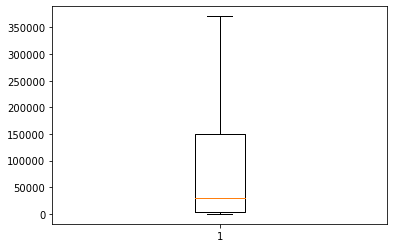

4770


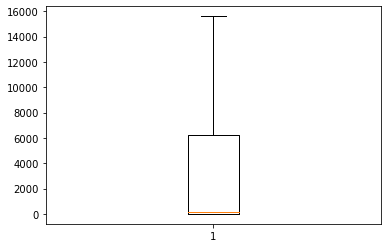

Total Bags


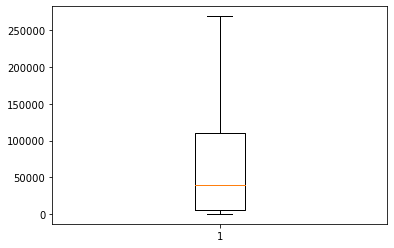

Small Bags


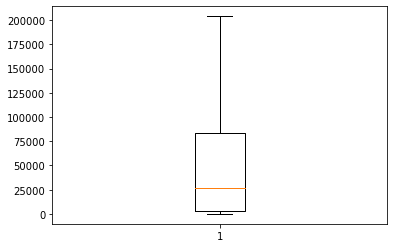

Large Bags


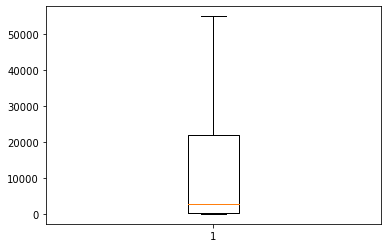

XLarge Bags


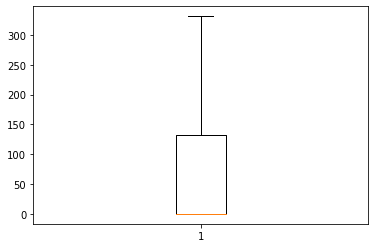

type


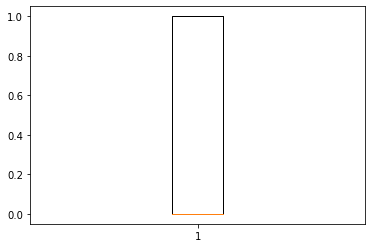

year


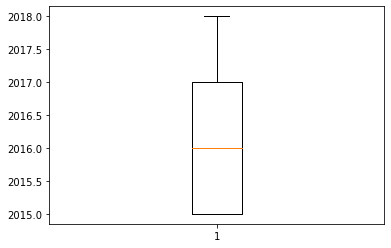

region


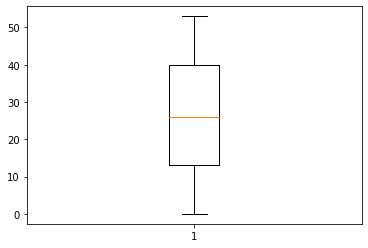

In [35]:
fig = plt.figure(figsize =(5, 5))
for i in avocado_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(avocado_dataset[i])
    # show plot
    plt.show()

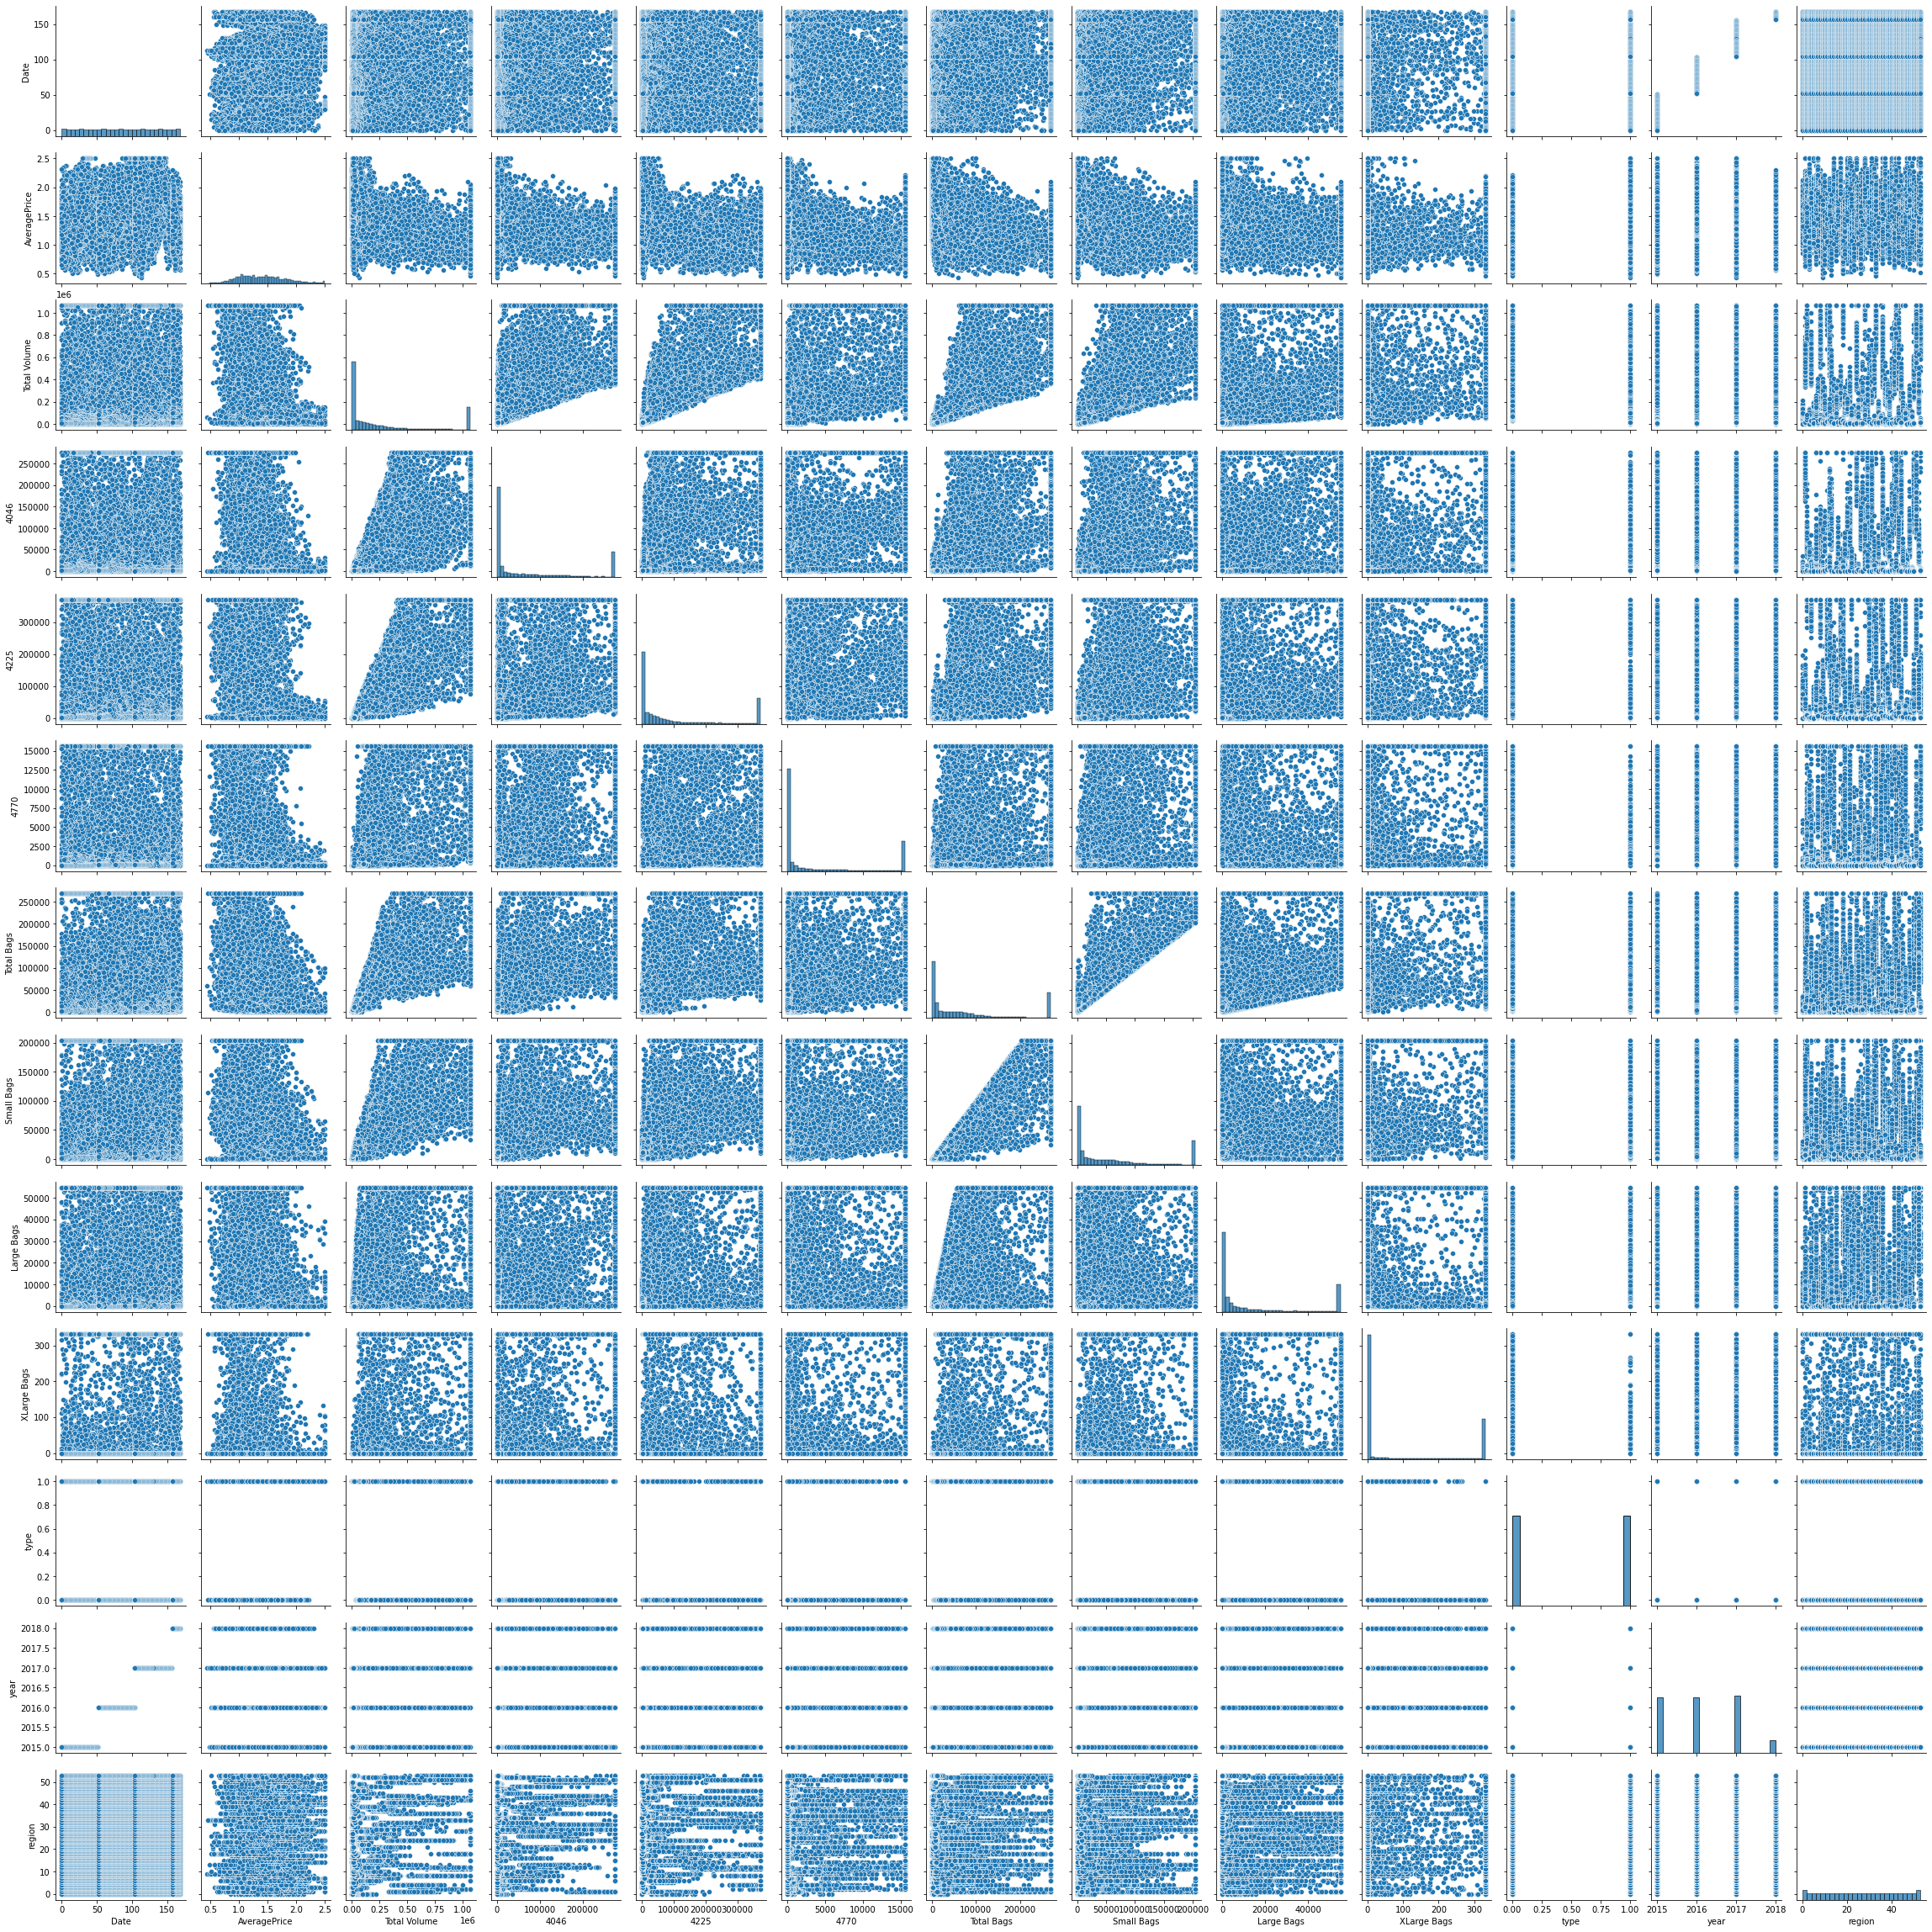

In [36]:
sns.pairplot(avocado_dataset)

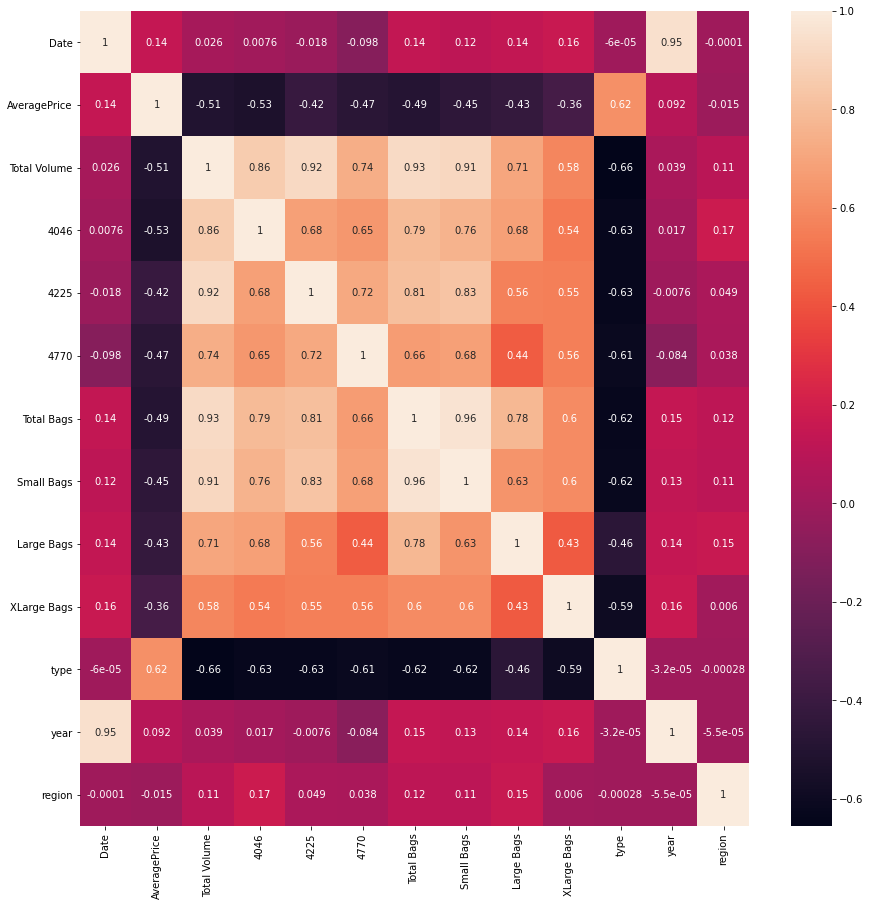

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(avocado_dataset.corr(), annot=True)
plt.show()

In [38]:
avocado_dataset.skew()

Date            0.000117
AveragePrice    0.453073
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [39]:
avocado_dataset.describe()

Date  AveragePrice  Total Volume           4046           4225  \
count  18249.000000  18249.000000  1.824900e+04   18249.000000   18249.000000   
mean      83.997096      1.403668  2.889859e+05   69525.206350   98713.852159   
std       48.787638      0.395427  3.701947e+05   99244.901205  133134.946501   
min        0.000000      0.440000  8.456000e+01       0.000000       0.000000   
25%       42.000000      1.100000  1.083858e+04     854.070000    3008.780000   
50%       84.000000      1.370000  1.073768e+05    8645.300000   29061.020000   
75%      126.000000      1.660000  4.329623e+05  111020.200000  150206.860000   
max      168.000000      2.500000  1.066148e+06  276269.395000  371003.980000   

               4770     Total Bags     Small Bags    Large Bags   XLarge Bags  \
count  18249.000000   18249.000000   18249.000000  18249.000000  18249.000000   
mean    3921.430544   77943.663114   57475.744762  14324.312070     82.932110   
std     5995.411078   93026.265810   69703.476607  20224.173615    138.106393   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%        0.000000    5088.640000    2849.420000    127.470000      0.000000   
50%      184.990000   39743.830000   26362.820000   2647.710000      0.000000   
75%     6243.420000  110783.370000   83337.670000  22029.250000    132.500000   
max    15608.550000  269325.465000  204070.045000  54881.920000    331.250000   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

In [40]:
#making two pair of dataset one for region prediction and other for average price prediction:
X_for_region=avocado_dataset.drop(columns=['region'])
Y_region=avocado_dataset['region']
X_for_price=avocado_dataset.drop(columns=['AveragePrice'])
Y_price=avocado_dataset['AveragePrice']

In [41]:
scalar= StandardScaler()
X_scaled_region= scalar.fit_transform(X_for_region)
X_scaled_price= scalar.fit_transform(X_for_price)

In [42]:
#VIF for Region prediction
#checking VIF value 
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_for_region.columns

vif_data1["VIF region"] = [variance_inflation_factor(X_scaled_region, i) for i in range(X_scaled_region.shape[1])]
  
vif_data1

feature  VIF region
0           Date   11.082060
1   AveragePrice    1.951484
2   Total Volume   39.883268
3           4046    6.995540
4           4225   12.497967
5           4770    2.614512
6     Total Bags   39.967834
7     Small Bags   24.888306
8     Large Bags    4.648710
9    XLarge Bags    1.951423
10          type    2.697670
11          year   10.718752

In [46]:
X_for_region1=avocado_dataset.drop(columns=['Total Volume','Total Bags','year','region'])
X_scaled_region1= scalar.fit_transform(X_for_region1)
vif_data12 = pd.DataFrame()
vif_data12["feature"] = X_for_region1.columns

vif_data12["new VIF region"] = [variance_inflation_factor(X_scaled_region1, i) for i in range(X_scaled_region1.shape[1])]
  
vif_data12

feature  new VIF region
0          Date        1.219647
1  AveragePrice        1.860222
2          4046        3.275261
3          4225        3.960665
4          4770        2.596489
5    Small Bags        4.651988
6    Large Bags        2.090824
7   XLarge Bags        1.920736
8          type        2.609528

In [47]:
#VIF for Price prediction
#checking VIF value 
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_for_price.columns

vif_data2["VIF price"] = [variance_inflation_factor(X_scaled_price, i) for i in range(X_scaled_price.shape[1])]
  
vif_data2

feature  VIF price
0           Date  10.461428
1   Total Volume  39.830174
2           4046   7.129391
3           4225  12.282273
4           4770   2.598062
5     Total Bags  39.911277
6     Small Bags  25.006895
7     Large Bags   4.693789
8    XLarge Bags   1.951223
9           type   2.198160
10          year  10.365900
11        region   1.076789

In [110]:
X_for_price22=avocado_dataset.drop(columns=['Total Volume','Total Bags','year','AveragePrice'])
X_scaled_price22= scalar.fit_transform(X_for_price22)
vif_data22 = pd.DataFrame()
vif_data22["feature"] = X_for_price22.columns

vif_data22["new VIF price"] = [variance_inflation_factor(X_scaled_price22, i) for i in range(X_scaled_price22.shape[1])]
  
vif_data22

feature  new VIF price
0         Date       1.172977
1         4046       3.301239
2         4225       3.904716
3         4770       2.576333
4   Small Bags       4.658069
5   Large Bags       2.050352
6  XLarge Bags       1.919052
7         type       2.160424
8       region       1.066194

In [49]:
X_trainr, X_testr, Y_trainr, Y_testr = train_test_split(X_scaled_region1,Y_region, test_size= 0.2, random_state=15)

In [137]:
X_trainp, X_testp, Y_trainp, Y_testp = train_test_split(X_scaled_price22,Y_price, test_size= 0.2, random_state=100)

# Prediction For Region (Classification):

In [56]:
svm_region_model=SVC()
parameter_svm={
            'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
    
}
svmR_gs= gs(estimator =svm_region_model, param_grid=parameter_svm,cv=20,refit=True, n_jobs=5)
svmR_gs.fit(X_trainr,Y_trainr)

GridSearchCV(cv=20, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [57]:
print('Best Score of SVC model : ',svmR_gs.best_score_)

Best Score of SVC model :  0.8110829246293477


In [59]:
svmR_gs.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [62]:
region_model1=SVC(C=1000, gamma=1, kernel='rbf')
region_model1.fit(X_trainr,Y_trainr)
region_m1_p=region_model1.predict(X_testr)

In [70]:
print(classification_report(region_m1_p, Y_testr))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        80
           1       0.72      0.74      0.73        66
           2       1.00      0.93      0.97        74
           3       0.70      0.68      0.69        68
           4       0.88      0.80      0.84        65
           5       0.83      0.72      0.77        72
           6       0.65      0.74      0.70        43
           7       0.92      0.96      0.94        68
           8       0.94      0.97      0.95        61
           9       0.80      0.75      0.77        75
          10       0.76      0.74      0.75        80
          11       0.91      0.86      0.89        74
          12       0.84      0.91      0.87        76
          13       0.71      0.79      0.75        66
          14       0.86      0.86      0.86        70
          15       0.69      0.75      0.72        59
          16       0.85      0.88      0.86        64
          17       0.97    

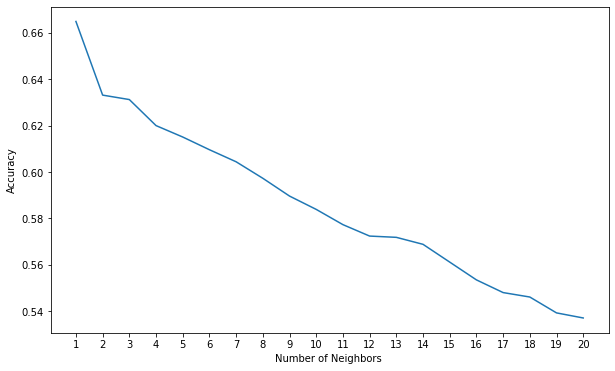

In [71]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_trainr,Y_trainr)
    yhat= knn.predict(X_testr)
    mean_acc[i-1] = metrics.accuracy_score(Y_testr, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [79]:
knn_region_model=KNeighborsClassifier()
para={
        'n_neighbors':[1],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knnR_gs= gs(estimator =knn_region_model, param_grid=para,cv=20, n_jobs=5)
knnR_gs.fit(X_trainr,Y_trainr)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [83]:
region_model2= KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)
region_model2.fit(X_trainr,Y_trainr)
region_m2_p=region_model2.predict(X_testr)

In [84]:
print(classification_report(region_m2_p, Y_testr))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        61
           1       0.49      0.56      0.52        59
           2       0.75      0.90      0.82        58
           3       0.50      0.49      0.49        68
           4       0.69      0.72      0.71        57
           5       0.75      0.64      0.69        73
           6       0.67      0.66      0.67        50
           7       0.82      0.76      0.79        76
           8       0.87      0.95      0.91        58
           9       0.63      0.63      0.63        70
          10       0.51      0.51      0.51        78
          11       0.70      0.78      0.74        63
          12       0.71      0.87      0.78        67
          13       0.53      0.63      0.58        62
          14       0.64      0.60      0.62        75
          15       0.59      0.61      0.60        62
          16       0.65      0.65      0.65        66
          17       0.76    

In [94]:
rfc_region_model=RandomForestClassifier()
paras={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[100,200,300,400],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4]
}
rfcR_rs= rs(estimator =rfc_region_model, param_distributions=paras,cv=20, n_jobs=10)
rfcR_rs.fit(X_trainr,Y_trainr)

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_jobs=10,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [1, 2, 3, 4],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4],
                                        'min_samples_leaf': [100, 200, 300,
                                                             400],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400]})

In [101]:
print('Best Score of SVC model via RandomizedSearchCV : ',rfcR_rs.best_score_)


Best Score of SVC model via RandomizedSearchCV :  0.4165332506529869


In [98]:
rfcR_rs.best_estimator_

RandomForestClassifier(max_depth=4, max_features=1, max_leaf_nodes=10,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=3)

In [100]:
region_model3=RandomForestClassifier(max_depth=4, max_features=1, max_leaf_nodes=10,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=3)
region_model3.fit(X_trainr,Y_trainr)
region_m3_p=region_model3.predict(X_testr)

In [102]:
print(classification_report(region_m3_p, Y_testr))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        83
           1       0.18      0.43      0.25        28
           2       0.43      0.73      0.55        41
           3       0.33      0.38      0.35        58
           4       0.49      0.56      0.52        52
           5       0.54      0.79      0.64        43
           6       0.61      0.45      0.52        67
           7       0.35      0.25      0.29        99
           8       0.89      0.46      0.61       122
           9       0.47      0.42      0.45        78
          10       0.10      0.62      0.18        13
          11       0.30      0.84      0.44        25
          12       0.54      0.67      0.59        66
          13       0.34      0.47      0.40        53
          14       0.53      0.86      0.65        43
          15       0.17      0.92      0.29        12
          16       0.67      0.56      0.61        79
          17       0.79    

Based on the Accuracy, f1 scores, precision and recall SVC model has the best scores

Due to time constraints couldn't perform GridSearchCV for random forest and didn't use decision Tree Model.

In [109]:
SVC_Model_for_Region= pickle.dumps(region_m1_p)

# Prediction For Average Price (Regression):

In [121]:
rfr=RandomForestRegressor()
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [80,100,200,300,400,500],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [2,4,6],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2,3],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=10, verbose=2, n_jobs=4)
rfr_gs.fit(X_trainp,Y_trainp)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [80, 100, 200, 300, 400, 500]},
             verbose=2)

In [122]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=300)

In [138]:
rfr_p=RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=10,n_estimators=300)
rfr_p.fit(X_trainp,Y_trainp)

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=300)

In [139]:
scores4 = cross_val_score(rfr_p, X_scaled_price22, Y_price, scoring='r2', cv=10)

In [140]:
print('Mean R2 Score for Random Forest Regression :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Random Forest Regression : 0.3096807467113353 
Standard Deviation is :  0.04989574458253507


In [141]:
alphas=np.random.uniform(low=0, high=10, size=(50,))
ridgecv=RidgeCV(alphas=alphas, cv=3,normalize=True)
ridgecv.fit(X_trainp,Y_trainp)
ridgecv.alpha_

price_model2=Ridge(alpha=ridgecv.alpha_)
price_model2.fit(X_trainp,Y_trainp)
scores5 = cross_val_score(price_model2, X_testp, Y_testp, scoring='r2', cv=3)
print('Mean R2 Score for Ridge Regression :',mean(scores5),'\nStandard Deviation is : ',std(scores5))

Mean R2 Score for Ridge Regression : 0.4728021257120381 
Standard Deviation is :  0.019513629186563266


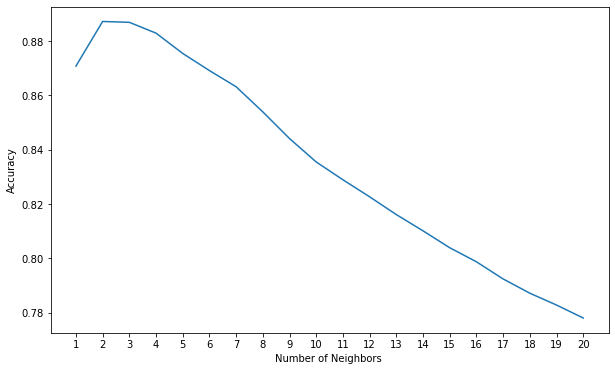

In [145]:
knn_p=KNeighborsRegressor()
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_trainp,Y_trainp)
    yhat2= knn.predict(X_testp)
    mean_acc[i-1] = metrics.r2_score(Y_testp, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

accuracy is high for n values 2 and 3

In [147]:
knn_price_model=KNeighborsRegressor()
para={
        'n_neighbors':[1,2],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn_price_model, param_grid=para,cv=20, n_jobs=5)
knn_gs.fit(X_trainp,Y_trainp)

GridSearchCV(cv=20, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [148]:
knn_gs.best_estimator_

KNeighborsRegressor(algorithm='brute', n_neighbors=2, weights='distance')

In [149]:
price_model3=KNeighborsRegressor(algorithm='brute', n_neighbors=2, weights='distance')
price_model3.fit(X_trainp,Y_trainp)

KNeighborsRegressor(algorithm='brute', n_neighbors=2, weights='distance')

In [171]:
scores6 = cross_val_score(price_model3, X_testp, Y_testp, scoring='r2', cv=50)
print('Mean R2 Score for KNeighbors Regression :',mean(scores6),'\nStandard Deviation is : ',std(scores6))

Mean R2 Score for KNeighbors Regression : 0.7613336743552875 
Standard Deviation is :  0.053104509793554


In [172]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [20, 200],
    'max_depth': [3, 4, 5, 6, 8, 15],
    'learning_rate':[0.1,0.15,0.2,0.3],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=5,verbose=5)
CV_xgb.fit(X_trainp,Y_trainp)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s


[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.6s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.1s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=5,

[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=200; total time=   0.7s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=200; total time=   0.7s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=200; total time=   0.7s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=300; total time=   1.2s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=300; total time=   1.1s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=300; total time=   1.2s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=300; total time=   1.2s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=300; total time=   1.2s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=15, n_estimators=200, n_jobs=100; total time=   5.9s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=1

[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.8s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.8s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_de

[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.0s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200; total time=   1.9s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_

[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estima

[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=8,

[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_e

[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estima

[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200; total time=   3.7s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200; total time=   3.8s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200; total time=   3.6s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200; total time=   3.7s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200; total time=   3.7s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300; total time=   5.2s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300; total time=   5.3s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300; total time=   5.2s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=300; total time=   5.3s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_est

[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.7s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.4s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.6s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.6s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.6s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.6s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=15

[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 1/5] END gamma=0.1, learning_rate=0.15, ma

[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=8

[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n

[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n

[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estima

[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   1.0s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=6, 

[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.0s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.0s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.1s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100; total time=   3.7s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100; total time=   5.1s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100; total time=   6.7s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100; total time=   4.5s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100; total time=   6.7s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_dep

[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estima

[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.2s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.2s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.8s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.8s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.7s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.8s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.5s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=15

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100; total time=   0.5s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_de

[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=100; total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=100; total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=100; total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=100; total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=100; total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=

[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200; total time=   0.5s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300; total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=3,

[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100; total time=   0.9s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estim

[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  16.2s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  17.2s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  24.6s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  20.4s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, 

[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.6s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.6s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   1.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200; total time=   0.9s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=5,

[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   1.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.6s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.5s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.6s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.5s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200; total time=   1.5s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.4s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.4s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=300; total time=   2.1s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=15

[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200; total time=   0.7s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300; total time=   0.9s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n

[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300; total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.6s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.3s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.5s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.4s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100; total time=   1.5s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200; total time=   2.1s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_

[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=100; total time=   1.4s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200; total time=   3.3s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200; total time=   2.9s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200; total time=   3.6s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200; total time=   2.5s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200; total time=   2.6s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300; total time=   4.3s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=4

[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.3s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.3s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.2s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200; total time=   1.3s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.7s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.6s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.5s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=300; total time=   1.6s
[CV 5/5] END gamma=0.3, learning_rate=0.15, ma

[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.4s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100; total time=   0.3s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=3, n_es

[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=300; total time=   1.2s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=100; total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estim

[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=100; total time=   7.5s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=100; total time=   9.5s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200; total time=  10.0s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200; total time=  13.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200; total time=  16.1s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200; total time=  11.9s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=200; total time=  16.3s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  14.7s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=15, n_estimators=200, n_jobs=300; total time=  19.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max

[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=200; total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=20, n_jobs=300; total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100; total time=   0.7s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estim

[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.7s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.8s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.9s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300; total time=   2.5s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.9s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.9s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.9s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   0.9s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100; total time=   1.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=15

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [173]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [175]:
model4=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1,
             monotone_constraints='()', n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model4.fit(X_trainp,Y_trainp)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [178]:
scores7 = cross_val_score(model4, X_testp, Y_testp, scoring='r2', cv=50)
print('Mean R2 Score for XGB Regression :',mean(scores7),'\nStandard Deviation is : ',std(scores7))

Mean R2 Score for XGB Regression : 0.8607072093258908 
Standard Deviation is :  0.037680627182037824


XGB Regressor model has higher r2 value and low standard deviation compared to other 3 model

In [179]:
#saving the model
XGBR_Model_for_Avocado_price= pickle.dumps(model4)